In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#modeling
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split


In [2]:
df=pd.read_csv("C:/Users/PMYLS/Desktop/mobile_phone_pricing/notebook/data/mobile_pricing.csv")

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
X=df.drop(columns=["price_range"],axis=1)

In [7]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [8]:
y=df["price_range"]

In [9]:
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [13]:
preprocessor = Pipeline(steps=[
    ("impute", SimpleImputer()),
    ("scaler", StandardScaler())
])

In [14]:
X=preprocessor.fit_transform(X)

In [15]:
X

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]], shape=(2000, 20))

In [17]:
# split the dataset into train and test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [18]:
print(X_train.shape,X_test.shape)

(1600, 20) (400, 20)


In [19]:
def evaluate_model(true,predict):
    accuracy=accuracy_score(true,predict)
    Confusion_matrix=confusion_matrix(true,predict)
    return accuracy,Confusion_matrix

In [30]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest Classifier": RandomForestClassifier(),
    "SVC": SVC(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Ada Boost Classifier": AdaBoostClassifier(),
    "Gradient Boosting Classifier": GradientBoostingClassifier(),
    "Cat Boost Classifier": CatBoostClassifier(verbose=0),
    "XGB Classifier": XGBClassifier(verbosity=0)
}
model_list=[]
acc_list=[]
for i in range(len(list(models))):
    model=list(models.values())[i]
    model_name=list(models.keys())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    # Evaluate Train and test data
    model_train_acc,model_train_confusion=evaluate_model(y_train,y_train_pred)

    model_test_acc,model_test_confusion=evaluate_model(y_test,y_test_pred)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model Accuracy For training data")
    print("Accuracy score: {:.4f}".format(model_train_acc))
    print("Confusion Matrix:")
    print(model_train_confusion)


    print("------------------------------------------------------")

    print("Model Accuracy for Test data")
    print("Accuracy score: {:.4f}".format(model_test_acc))
    print("Confusion Matrix:")
    print(model_test_confusion)
    acc_list.append(model_test_acc)


    print("="*35)
    print("\n")


Logistic Regression
Model Accuracy For training data
Accuracy score: 0.9756
Confusion Matrix:
[[391   4   0   0]
 [  8 394   7   0]
 [  0   7 393   8]
 [  0   0   5 383]]
------------------------------------------------------
Model Accuracy for Test data
Accuracy score: 0.9775
Confusion Matrix:
[[102   3   0   0]
 [  0  91   0   0]
 [  0   2  87   3]
 [  0   0   1 111]]


Random Forest Classifier
Model Accuracy For training data
Accuracy score: 1.0000
Confusion Matrix:
[[395   0   0   0]
 [  0 409   0   0]
 [  0   0 408   0]
 [  0   0   0 388]]
------------------------------------------------------
Model Accuracy for Test data
Accuracy score: 0.8825
Confusion Matrix:
[[101   4   0   0]
 [  9  77   5   0]
 [  0   7  76   9]
 [  0   0  13  99]]


SVC
Model Accuracy For training data
Accuracy score: 0.9825
Confusion Matrix:
[[390   5   0   0]
 [  3 401   5   0]
 [  0   4 402   2]
 [  0   0   9 379]]
------------------------------------------------------
Model Accuracy for Test data
Accura

In [31]:
pd.DataFrame(list(zip(model_list, acc_list)), columns=["Model Name", "Accuracy Score"])\
  .sort_values(by="Accuracy Score", ascending=False)


,Model Name,Accuracy Score
0,Logistic Regression,0.9775
6,Cat Boost Classifier,0.9425
5,Gradient Boosting Classifier,0.9050
7,XGB Classifier,0.9050
2,SVC,0.8925
1,Random Forest Classifier,0.8825
3,Decision Tree Classifier,0.8150
4,Ada Boost Classifier,0.7150


#### Logistic Regression

In [32]:
lr_model=LogisticRegression(fit_intercept=True)
lr_model=lr_model.fit(X_train,y_train)
y_pred=lr_model.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.9775


### Print y_pred and y_test

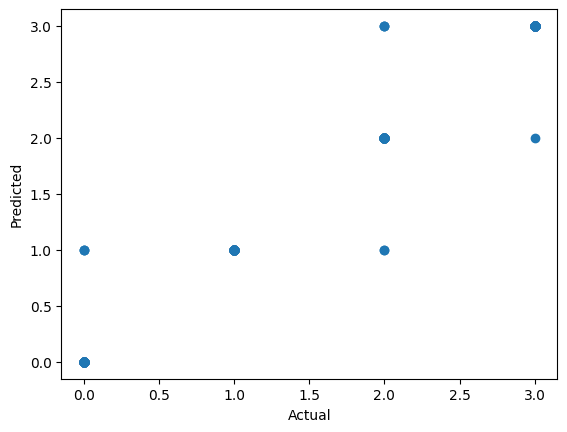

In [34]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted");